In [1]:
import tensorflow as tf

## Set up & train model

In [2]:
mnist = tf.keras.datasets.mnist  # 28x28 images of hand-written digits

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))    #output layer

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 4s 61us/step - loss: 0.2596 - acc: 0.9246
Epoch 2/3
60000/60000 [==============================] - 4s 59us/step - loss: 0.1038 - acc: 0.9675
Epoch 3/3
60000/60000 [==============================] - 3s 56us/step - loss: 0.0720 - acc: 0.9771


In [11]:
x_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Loss and Accuracy

In [3]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 27us/step
0.10675032079387456 0.9674


In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap=plt.cm.binary)

## Save model, load model

In [5]:
model.save('epic_num_reader.model')

In [6]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [12]:
predictions = new_model.predict(x_test)

In [13]:
import numpy as np

print (np.argmax(predictions[0]))

7


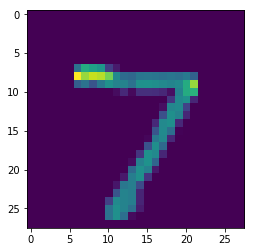

In [14]:
plt.imshow(x_test[0])
plt.show()